# Investigate mixing processes in accretor models
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/" # Brott+11_ov/" #
binary = folder+"binary_to_postRLOF/"# "/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov/"
# binary = folder+"binary_to_postRLOF/"
# dhfile = binary+"/LOGS1/history.data"
# hfile1 = binary+'/LOGS2/history.data'
LOGS2 = binary+'/LOGS2/'

re-run\_exponential


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:154: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


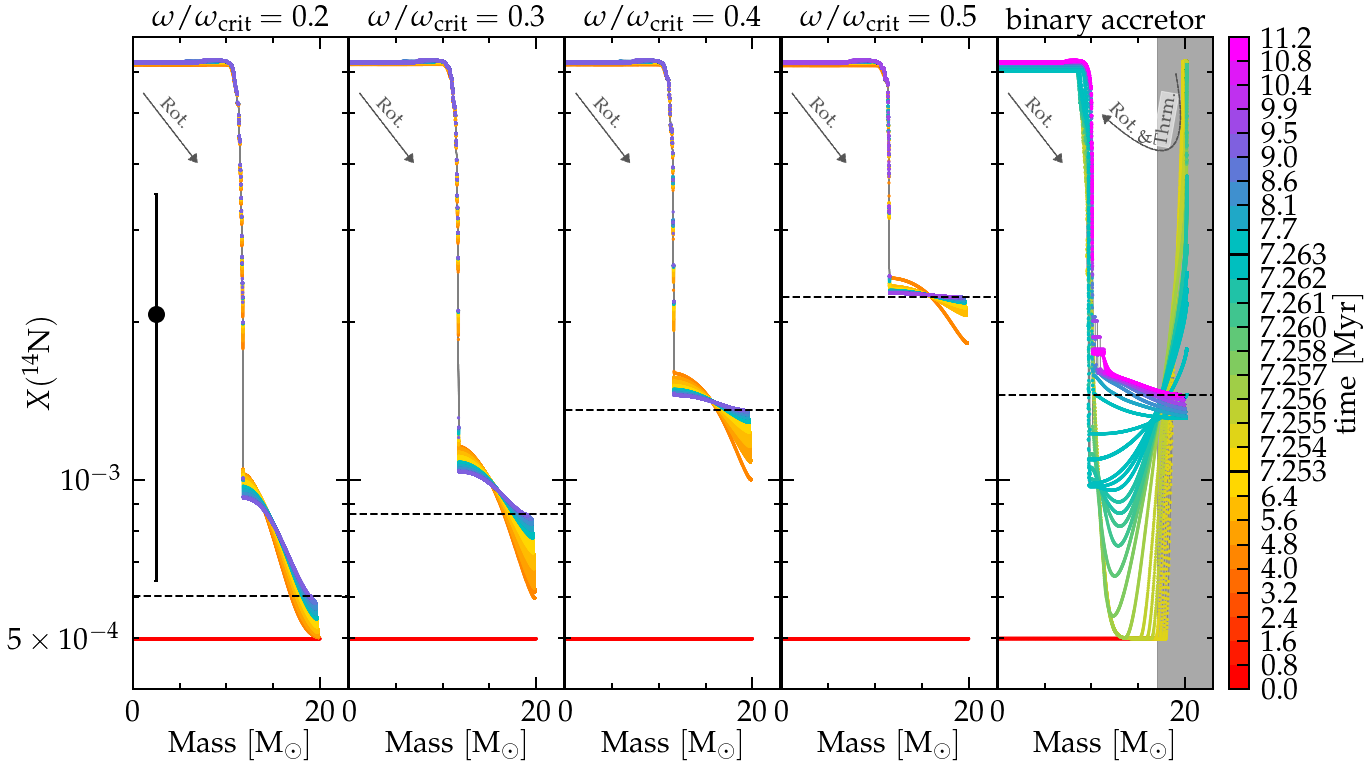

In [8]:
# n14 better colors
fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:, :30])
ax2 = fig.add_subplot(gs[:, 30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])
cax3 = fig.add_subplot(gs[:40, 152:])
cax2 = fig.add_subplot(gs[40:80, 152:])
cax1 = fig.add_subplot(gs[80:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
ax1.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax1.text(-1.5, 5e-4,r"$5\times 10^{-4}$",  ha="right", va="center", fontsize=30, transform=ax1.transData)


# get colormaps -- needs RLOF timing
src_b, col_b = getSrcCol(bfile)
rl_relative_gap_1 = src_b[:, col_b.index("rl_relative_overflow_1")]
iRLOF = rl_relative_gap_1 > 0
src_1, col_1 = getSrcCol(hfile1)
time = src_1[:, col_1.index('star_age')]
src_2, col_2 = getSrcCol(hfile2)
time_accretor_sin = src_2[:, col_2.index('star_age')]

# the limiting times are in years
t1 = min(time[iRLOF])
t2 = max(time[iRLOF])
t3 = max(time_accretor_sin)
cmap1, vmin1, vmax1, norm1, cmap2, vmin2, vmax2, norm2, cmap3, vmin3, vmax3, norm3 = get_three_colormaps(t1, t2, t3)

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=7e-3, ymin=4e-4)
    # ax.set_facecolor('#d8d8d8')
    ax.set_xlim(xmin=0, xmax=23)
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # y_ticks = ax.yaxis.get_major_ticks()
    # y_ticks[-1].label.set_visible(False)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]  # best model

for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 20, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=vmin1, vmax=vmax1, rasterized=True, cmap=cmap1, norm=norm1)
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        # ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 17, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=vmin1, vmax=vmax1, rasterized=True, cmap=cmap1, norm=norm1)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::120]+profiles_sin[::100]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[40:] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        n = src[:, col.index("n14")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile) # in Myrs
        # select the correct colormap
        if age < t1*1e-6:
            cmap = cmap1
            vmin = vmin1
            vmax = vmax1
            norm = norm1
        elif age < t2*1e-6:
            cmap = cmap2
            vmin = vmin2
            vmax = vmax2
            norm = norm2
        else: # age > t2
            cmap = cmap3
            vmin = vmin3
            vmax = vmax3
            norm = norm3
        ax.plot(m, n, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m, n, c=[age*1e6]*len(n), s=5, vmin=vmin, vmax=vmax, rasterized=True, cmap=cmap, norm=norm)
        if profile == profiles[-1]:
            ax.axhline(n[0],0,1, ls='--', lw=2, c='k', zorder=100, rasterized=True)       

# n14 from Villamariz & Herrero 2005
n, err_n =  get_zeta_oph_surface_n(X=0.678010)
ax1.errorbar(2.5,n, yerr=err_n, c='k', ms=15, marker="o")

# arrows for rot mix            
style = "Simple, tail_width=0.5, head_width=10, head_length=8"
kw = dict(arrowstyle=style, color='#555555', ls='--', zorder=100)
for ax in axes:
    arrow_rot_mix = mpl.patches.FancyArrowPatch((1, 5.5e-3), (7,4e-3), **kw)
    ax.add_patch(arrow_rot_mix)
    ax.text(4.5, 5e-3, r"$\mathrm{Rot.}$", fontsize=20, color='#555555', va="center", ha="center", rotation=-47)


# arrow in last panel
arrow_from_surf = mpl.patches.FancyArrowPatch((19, 6e-3), (11,5e-3),
                                              connectionstyle="arc3,rad=-1.5", **kw)
# ax5.text(19, 5e-3, r"$\mathrm{Rot.+Therm.}$", ha="right", va="center", color='#555555', fontsize=20)
ax5.text(13.5, 4.9e-3, r"$\mathrm{Rot.}$", ha="center", va="center",rotation=-47, color='#555555', fontsize=20)
ax5.text(16.5, 4.5e-3, r"$\&$", ha="right", va="center", color='#555555', fontsize=20)
ax5.text(16.5, 4.3e-3, r"$\mathrm{Thrm.}$", ha="left", va="bottom",rotation=80, color='#555555', fontsize=20,
         bbox=dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round,pad=0'))
ax5.add_patch(arrow_from_surf)

# label colormaps
p1 = ax.scatter([-1, -3], [10, 20], c=[t2/2.0, t2], s=5, vmin=vmin1, vmax=vmax1, rasterized=True, cmap=cmap1, norm=norm1)
p2 = ax.scatter([-1, -3], [10, 20], c=[t3/2.0, t3], s=5, vmin=vmin2, vmax=vmax2, rasterized=True, cmap=cmap2, norm=norm2)
p3 = ax.scatter([-1, -3], [10, 20], c=[t3, t3], s=5, vmin=vmin3, vmax=vmax3, rasterized=True, cmap=cmap3, norm=norm3)
cbar1 = plt.colorbar(p1, cax=cax1) 
cbar2 = plt.colorbar(p2, cax=cax2) 
cbar3 = plt.colorbar(p3, cax=cax3)

cbar1.set_ticks(np.linspace(vmin1, vmax1, 10))
labels = [f"${i*1e-6:.1f}$" for i in cbar1.get_ticks()]
cbar1.set_ticklabels(labels[:-1])
cbar1.ax.minorticks_off()

cbar2.set_ticks(np.linspace(vmin2, vmax2, 10)) # remove the boundary tick
labels = [f"${i*1e-6:.3f}$" for i in cbar2.get_ticks()]
cbar2.set_ticklabels(labels)
cbar2.ax.minorticks_off()

cbar3.set_ticks(np.linspace(vmin3, vmax3, 10)) # remove the boundary tick
labels = [f"${i*1e-6:.1f}$" for i in cbar3.get_ticks()]
labels[0] = ""
cbar3.set_ticklabels(labels)
cbar3.ax.minorticks_off()

cax2.set_ylabel(r"$\mathrm{time \ [Myr]}$")
ax5.axvspan(17, 23, alpha=0.5, color='#555555', zorder=0)

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/n14_colored.pdf", rasterized=True)    

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


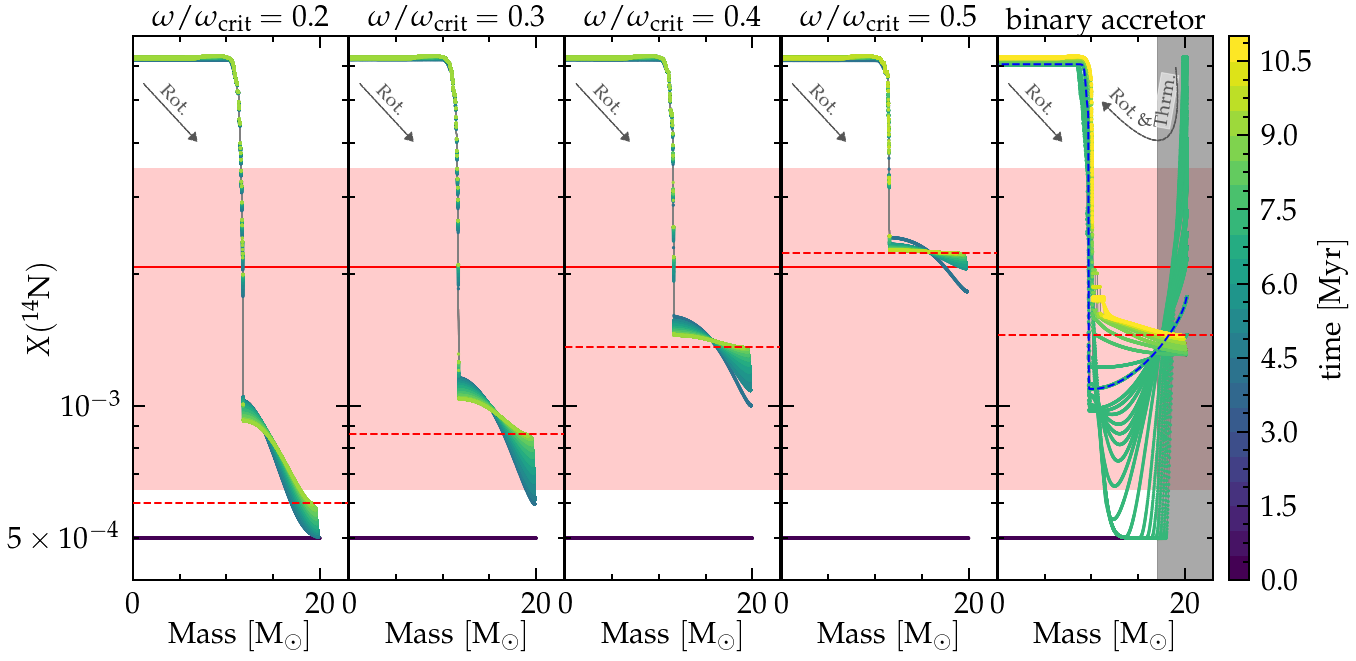

In [6]:
# n14 only
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:, :30])
ax2 = fig.add_subplot(gs[:, 30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])
cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
ax1.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax1.text(-1.5, 5e-4,r"$5\times 10^{-4}$",  ha="right", va="center", fontsize=30, transform=ax1.transData)

# for time [in Myrs]
vmin=0
vmax=11
# define discrete colormap
cmap = plt.cm.viridis #summer #plasma #inferno #viridis #hsv# gnuplot #
norm = mpl.colors.BoundaryNorm(np.arange(vmin, vmax, 11), cmap.N)
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# # create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# # define the bins and normalize
Ncolors = 23
bounds = np.linspace(vmin, vmax, Ncolors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=7e-3, ymin=4e-4)
    # ax.set_facecolor('#d8d8d8')
    ax.set_xlim(xmin=0, xmax=23)
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # y_ticks = ax.yaxis.get_major_ticks()
    # y_ticks[-1].label.set_visible(False)

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]  # best model

for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 20, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True, cmap=cmap, norm=norm)
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        # ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 17, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True, cmap=cmap, norm=norm)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::120]+profiles_sin[::100]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[40:] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        n = src[:, col.index("n14")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, n, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True, cmap=cmap, norm=norm)
        if profile == profiles[-1]:
            ax.axhline(n[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)       
    n, err_n =  get_zeta_oph_surface_n(X=0.678010)
    ax.axhline(n, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2, zorder=0)

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
n = src[:, col.index("n14")]
m = src[:, col.index("mass")]
age = get_age_from_profile(profile)
ax5.plot(m, n, c='b', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")
ax5.axvspan(17, 23, alpha=0.5, color='#555555', zorder=0)


style = "Simple, tail_width=0.5, head_width=10, head_length=8"
kw = dict(arrowstyle=style, color='#555555', ls='--', zorder=100)

# arrows for rot mix_
for ax in axes:
    arrow_rot_mix = mpl.patches.FancyArrowPatch((1, 5.5e-3), (7,4e-3), **kw)
    ax.add_patch(arrow_rot_mix)
    ax.text(4.5, 5e-3, r"$\mathrm{Rot.}$", fontsize=20, color='#555555', va="center", ha="center", rotation=-47)

# arrow in last panel
arrow_from_surf = mpl.patches.FancyArrowPatch((19, 6e-3), (11,5e-3),
                             connectionstyle="arc3,rad=-1.5", **kw)
# ax5.text(19, 5e-3, r"$\mathrm{Rot.+Therm.}$", ha="right", va="center", color='#555555', fontsize=20)
ax5.text(13.5, 4.9e-3, r"$\mathrm{Rot.}$", ha="center", va="center",rotation=-47, color='#555555', fontsize=20)
ax5.text(16.5, 4.5e-3, r"$\&$", ha="right", va="center", color='#555555', fontsize=20)
ax5.text(16.5, 4.3e-3, r"$\mathrm{Thrm.}$", ha="left", va="bottom",rotation=80, color='#555555', fontsize=20,
         bbox=dict(facecolor='w', alpha=0.5, edgecolor='w', boxstyle='round,pad=0'))
ax5.add_patch(arrow_from_surf)

# plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/n14_struct_complete_zeta_ab.pdf", rasterized=True)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


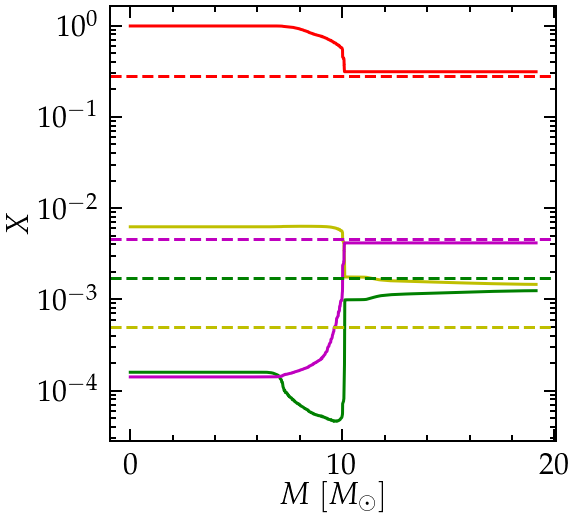

In [34]:
# final chemical profiles
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:, :])
profile = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)[-1]
hfile = folder+'/history.data'
src, col = getSrcCol(hfile)
he_init = src[0, col.index("surface_he4")]
c_init = src[0, col.index("surface_c12")]
n_init = src[0, col.index("surface_n14")]
o_init = src[0, col.index("surface_o16")]

src, col = getSrcCol(profile)
he = src[:, col.index("he4")]
c = src[:, col.index("c12")]
o = src[:, col.index("o16")]
n = src[:, col.index("n14")]
m = src[:, col.index("mass")]

ax.plot(m, he, c='r')
ax.plot(m, c, c='g')
ax.plot(m, n, c='y')
ax.plot(m, o, c='m')

ax.set_xlabel(r"$M\ [M_\odot]$")
ax.set_ylabel(r"$X$")

ax.axhline(he_init, 0,1,c='r', ls='--')
ax.axhline(c_init, 0,1,c='g', ls='--')
ax.axhline(o_init, 0,1,c='m', ls='--')
ax.axhline(n_init, 0,1,c='y', ls='--')
# ax.set_ylim(0,1)
ax.set_yscale('log')

In [ ]:
# all rot rate and abundances
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:40, :30])
ax2 = fig.add_subplot(gs[:40, 30:60])
ax3 = fig.add_subplot(gs[:40, 60:90])
ax4 = fig.add_subplot(gs[:40, 90:120])
ax5 = fig.add_subplot(gs[:40, 120:150])

bx1 = fig.add_subplot(gs[40:80, :30])
bx2 = fig.add_subplot(gs[40:80, 30:60])
bx3 = fig.add_subplot(gs[40:80, 60:90])
bx4 = fig.add_subplot(gs[40:80, 90:120])
bx5 = fig.add_subplot(gs[40:80, 120:150])

cx1 = fig.add_subplot(gs[80:120, :30])
cx2 = fig.add_subplot(gs[80:120, 30:60])
cx3 = fig.add_subplot(gs[80:120, 60:90])
cx4 = fig.add_subplot(gs[80:120, 90:120])
cx5 = fig.add_subplot(gs[80:120, 120:150])

cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
bxes = [bx1, bx2, bx3, bx4, bx5]
cxes = [cx1, cx2, cx3, cx4, cx5]


ax1.set_ylabel(r"$X(^{12}\mathrm{C})$")
bx1.set_ylabel(r"$X(^{14}\mathrm{N})$")
cx1.set_ylabel(r"$X(^{16}\mathrm{O})$")

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=2e-3, ymin=2e-5)
    ax.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    c, err_c =  get_zeta_oph_surface_c()
    ax.axhline(c, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax,3)
    ax.fill_between(x, y1=c-err_c, y2=c+err_c, fc='r',alpha=0.2, zorder=0)   
for bx in bxes:
    bx.set_yscale('log')
    bx.set_ylim(ymax=7e-3, ymin=4e-4)
    # bx.set_facecolor('#d8d8d8')
    bx.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    n, err_n =  get_zeta_oph_surface_n()
    bx.axhline(n, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = bx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    bx.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2, zorder=0)
for cx in cxes:
    cx.set_yscale('log')
    cx.set_ylim(ymax=5e-3, ymin=1e-4)
    cx.set_xlim(xmin=0, xmax=22.5)
    cx.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # add observed abundances
    o, err_o =  get_zeta_oph_surface_o()
    cx.axhline(o, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = cx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    cx.fill_between(x, y1=o-err_o, y2=o+err_o, fc='r',alpha=0.2, zorder=0)

    
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

bx2.set_yticklabels([])
bx3.set_yticklabels([])
bx4.set_yticklabels([])
bx5.set_yticklabels([])

cx2.set_yticklabels([])
cx3.set_yticklabels([])
cx4.set_yticklabels([])
cx5.set_yticklabels([])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])

bx1.set_xticklabels([])
bx2.set_xticklabels([])
bx3.set_xticklabels([])
bx4.set_xticklabels([])
bx5.set_xticklabels([])

folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

for folder in folders:
    ax = axes[folders.index(folder)]
    bx = bxes[folders.index(folder)]
    cx = cxes[folders.index(folder)]
    
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 20, 1500), [c12zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        bx.scatter(np.linspace(0, 20, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        cx.scatter(np.linspace(0, 20, 1500), [o16zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        bx.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        cx.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 17, 1500), [c12zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        bx.scatter(np.linspace(0, 17, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        cx.scatter(np.linspace(0, 17, 1500), [o16zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        profiles = profiles_bin[::120]+profiles_sin[::100]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[40:] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        c = src[:, col.index("c12")]
        n = src[:, col.index("n14")]
        o = src[:, col.index("o16")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, c, c='#808080', lw=1, zorder=0, rasterized=True)
        bx.plot(m, n, c='#808080', lw=1, zorder=0, rasterized=True)
        cx.plot(m, o, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m,c, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        p = bx.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        p = cx.scatter(m,o, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(c[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            bx.axhline(n[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            cx.axhline(o[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
    

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
c = src[:, col.index("c12")]
n = src[:, col.index("n14")]
o = src[:, col.index("o16")]
m = src[:, col.index("mass")]
ax.plot(m, c, c='b', lw=2, ls='--', zorder=100)
bx.plot(m, n, c='b', lw=2, ls='--', zorder=100)
cx.plot(m, o, c='b', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/huge_composition.pdf",rasterized=True)

In [ ]:
# internal rotation rate
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:,:30])
ax2 = fig.add_subplot(gs[:,30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])

cax = fig.add_subplot(gs[:, 152:])

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])


folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

axes = [ax1,ax2,ax3,ax4,ax5]

for ax in axes:
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    ax.set_ylim(0, 420)
    ax.set_xlim(xmin=0, xmax=23)
# ax1.set_ylabel(r"$\omega \ \mathrm{[rad\ s^{-1}]}$")
ax1.set_ylabel(r"$v_\mathrm{rot} = \omega\times r \ \mathrm{[km\ s^{-1}]}$")


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # let's plot less profiles for clarity
        profiles = profiles[::10]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 23, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::120]+profiles_sin[::100]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[40:] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        m = src[:, col.index("mass")]
        omega = src[:, col.index("omega")]
        r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
        vrot = omega*r
        age = get_age_from_profile(profile)
        ax.plot(m, vrot, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m, vrot, c=[age]*len(m), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(vrot[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            
# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
omega = src[:, col.index("omega")]
r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
vrot = omega*r    
m = src[:, col.index("mass")]
age = get_age_from_profile(profile)
ax5.plot(m, vrot, c='b', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/zeta_Rotational_struct.pdf", rasterized=True)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


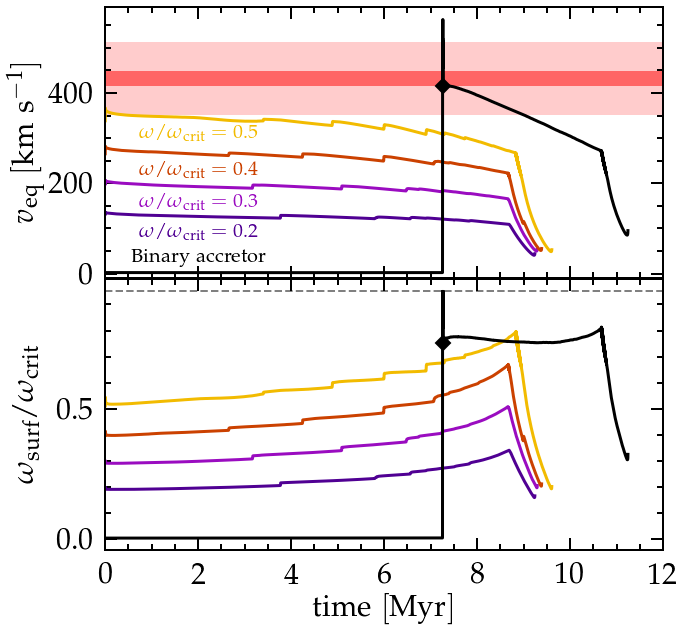

In [6]:
# surface rotation rate
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:50,:])
bx = fig.add_subplot(gs[50:,:])

# overplot single rotating stars
folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]
colors = plt.cm.gnuplot(np.linspace(0.1,0.9,len(folders)))
for f in folders:
    t, v = get_surface_rotation_time(f+'/history.data')
    src, col = getSrcCol(f+'history.data')
    # print(col)
    omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]   
    c = colors[folders.index(f)]
    ax.plot(t, v, c=c, zorder=2)
    bx.plot(t, omega_div_omega_crit, c=c, zorder=2)
    ax.text(2, v[np.argmin(np.absolute(t-2))]-20,
            "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$",
            va="top", ha="center", color=c, fontsize=20) #, bbox=dict(facecolor='w', edgecolor=c, boxstyle='round,pad=0'))


plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")
# t, v = get_surface_rotation_time(hfile1)
src, col = getSrcCol(hfile1)
omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]

t = src[:, col.index("star_age")]*1e-6
bx.plot(t, omega_div_omega_crit, c='k', zorder=2)
src, col = getSrcCol(hfile2)
omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]
t = src[:, col.index("star_age")]*1e-6
bx.plot(t, omega_div_omega_crit, c='k', zorder=2)
bx.plot(t[0], omega_div_omega_crit[0], 'kD', ms=10, zorder=2)

# modnum = src[:, col.index("model_number")]
# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# t, v = get_surface_rotation_time(hfile2)
# src, col = getSrcCol(hfile2)
# modnum = src[:, col.index("model_number")]

# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# ax.plot(np.nan, np.nan,c='k', ls="-.", label="$\mathrm{accretor}$")
# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
bx.set_xlim(0, 12)
ax.set_xlim(bx.get_xlim())
xmin, xmax = bx.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+5*err_vsini], facecolor='r', alpha=0.2, zorder=1)
# ax.legend(loc="center right", fontsize=30)
bx.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_xticklabels([])
#bx.set_ylim(0,1)
ax.set_ylim(ymin=-10)
bx.axhline(0.95,0,1, ls='--', lw=2, zorder=0, c='#808080')
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")
bx.set_ylabel(r"$\omega_\mathrm{surf}/\omega_\mathrm{crit}$")
ax.text(2, 15, r"$\mathrm{Binary\ accretor}$", fontsize=20, c='k', va="bottom", ha="center")
fig.align_labels()

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/zeta_rot.pdf")


In [ ]:
# omega profile
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:,:30])
ax2 = fig.add_subplot(gs[:,30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])

cax = fig.add_subplot(gs[:, 152:])

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])


folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

axes = [ax1,ax2,ax3,ax4, ax5]

for ax in axes:
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    ax.set_ylim(0, 12)
    ax.set_xlim(xmin=0, xmax=23)
# ax1.set_ylabel(r"$\omega \ \mathrm{[rad\ s^{-1}]}$")
ax1.set_ylabel(r"$\omega\ \mathrm{[day^{-1}]}$")


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # let's plot less profiles for clarity
        profiles = profiles[::10]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 23, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::120]+profiles_sin[::100]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[40:] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        m = src[:, col.index("mass")]
        omega = src[:, col.index("omega")]*60*60*24
        # r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
        # vrot = omega*r
        age = get_age_from_profile(profile)
        ax.plot(m, omega, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m, omega, c=[age]*len(m), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(omega[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
omega = src[:, col.index("omega")]*60*60*24
r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
m = src[:, col.index("mass")]
ax5.plot(m, omega, c='b', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")
plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/omega_struct.pdf", rasterized=True)

In [24]:
# how long is rigid rotation lasting
def how_long_rigid(folder, tolerance=0.01):
    """
    given the folder where profiles for the binary are saved and the tolerance we accept for "rigid" in cycles/days
    returns the duration of the phase when max(omega)-min(omega) is within the tolerance, i.e. how long the accretor is rigidly rotating.
    """
    profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
    profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
    profiles = profiles_bin+profiles_sin
    # remove the pre-RLOF evolution -- the model is initialized as rigid rotators and we don't want to catch that
    profiles = [p for p in profiles if get_age_from_profile(p)> 7.2 ]
    t_start_rigid = -1
    t_end_rigid = t_start_rigid
    for profile in profiles:
        src, col = getSrcCol(profile)
        omega = src[:, col.index("omega")]*60*60*24
        if t_start_rigid == -1:
            if max(omega)-min(omega) <= tolerance:
                t_start_rigid = get_age_from_profile(profile)
                print("found t_start_rigid", t_start_rigid)
        else:
            # if here, we have t_start_rigid
            if max(omega)-min(omega) > tolerance:
                t_end_rigid = get_age_from_profile(profile)
                print("found t_end_rigid", t_end_rigid)
                break # found the end
    return t_end_rigid - t_start_rigid # in Myrs


folder="/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"
print(how_long_rigid(folder, ), "Myrs")

found t_start_rigid 7.270154841789378
found t_end_rigid 7.28006580196068
0.00991096017130122 Myrs


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  

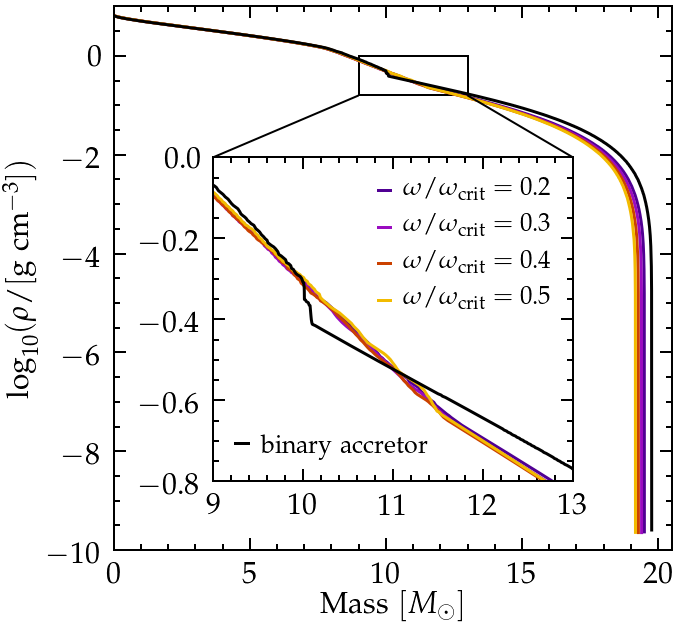

In [7]:
# density profile comparison
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:, :])
# zx = ax.inset_axes([5,-1,10,10],)
zx = inset_axes(ax, 5, 4.5, bbox_to_anchor=(0.85,0.75), bbox_transform=ax.transAxes)


pfile_accretor = LOGS_single+"profile893.data"
src, col = getSrcCol(pfile_accretor)
h1_center_acc = get_center_h1(pfile_accretor)
rho = src[:, col.index("logRho")]
m = src[:, col.index("mass")]
label = ""
ax.plot(m, rho, c='k', label=label, zorder=10)
plot, = zx.plot(m, rho, c='k', label=label, zorder=10)


single_folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]

colors = plt.cm.gnuplot(np.linspace(0.1,0.9,len(single_folders)))


for f in single_folders:
    profiles = sorted(glob.glob(f+'profile*.data'), key=get_age_from_profile)
    min_diff = 1e99
    i_prof_to_use = -1
    label = "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$"
    c = colors[single_folders.index(f)] 
    for p in profiles:
        h1_center = get_center_h1(p)
        if np.absolute(h1_center - h1_center_acc) <= min_diff:
            i_prof_to_use = profiles.index(p)
            min_diff = np.absolute(h1_center - h1_center_acc)
            # print("new prof", h1_center, f.split('/')[-3])
    profile = profiles[i_prof_to_use]
    src, col = getSrcCol(profile)
    h1_center = get_center_h1(profile)
    # print("using h1_center", h1_center)
    rho = src[:, col.index("logRho")]
    m = src[:, col.index("mass")]
    ax.plot(m, rho, c=c, label=label)
    zx.plot(m, rho, c=c, label=label)



ax.set_xlabel("$\mathrm{Mass\ }[M_\odot]$")
ax.set_ylabel(r"$\log_{10}(\rho/\mathrm{[g\ cm^{-3}]})$")

#ax.set_ylim(ymax=4)
zx.set_xlim(9,13)
zx.set_ylim(ymin=-0.8, ymax=0)
my_mark_inset(ax, zx, loc1a=2, loc2a=1, loc1b=3, loc2b=4, fc="none",lw=2, ec="k",zorder=0)

l1 = zx.legend(fontsize=25, handlelength=0.5, handletextpad=0.5)

l2 = zx.legend([plot], [r"$\mathrm{binary\ accretor}$"], fontsize=25, handlelength=0.5, handletextpad=0.5, loc="lower left")
zx.add_artist(l1)
ax.set_xlim(0,20.5)
ax.set_ylim(-10, 1)

plt.savefig('/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/rho_comparison.pdf')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


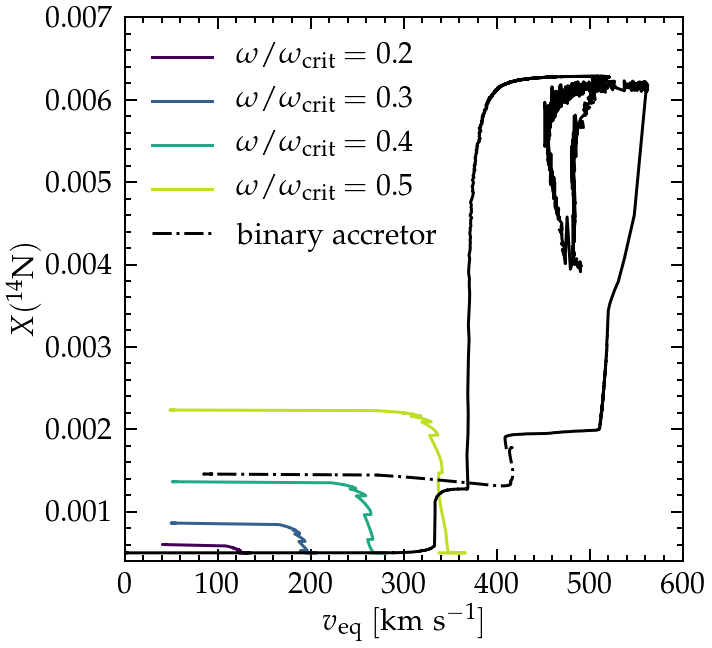

In [8]:
# Hunter diagram

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)

ax = fig.add_subplot(gs[:, :])
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")

folders = [
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

colors = plt.cm.viridis(np.linspace(0,0.9,len(folders)-1))
# ax.set_ylim(ymax=9e-3, ymin=4e-4)
ax.set_ylim(ymax=7e-3, ymin=4e-4)
ax.set_xlim(0, 600)    

for folder in folders:
    if "single" in folder:
        label = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        c = colors[folders.index(folder)] 
        src, col = getSrcCol(folder+"/history.data")
        n14 = src[:, col.index("surface_n14")]
        vrot = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot, n14, c=c, label=label)
    if "binary" in folder:
        label = "$\mathrm{binary\ accretor}$"
        c = 'k'
        src, col = getSrcCol(folder+"/history.data")
        n14_1 = src[:, col.index("surface_n14")]
        vrot_1 = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot_1, n14_1, c=c)
        # src, col = getSrcCol(folder+"../binary_history.data")
        # rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
        # ind = rl_relative_gap_1 > 0
        # ax.plot(vrot_1[ind], n14_1[ind], c='r', ms=10, zorder=100)
        # now plot post-RLOF
        src, col = getSrcCol(folder+"/../../accretor_to_TAMS/LOGS/history.data")
        n14_2 = src[:, col.index("surface_n14")]
        vrot_2 = src[:, col.index("surf_avg_v_rot")]       
        ax.plot(vrot_2, n14_2, c=c,ls='-.', label=label)

        
# n, err_n =  get_zeta_oph_surface_n()
# ax.axhline(n, 0,1,c='r', lw=2)
# xmin, xmax = ax.get_xlim()
# x = np.linspace(xmin, xmax, 3)
# ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2)

ax.legend()
# ax.set_yscale('log')
# plt.savefig("/mnt/home/mrenzo/TMP/hunter_zeta.pdf")

# diffusion coefficients across the evolution

In [ ]:
# small plots for movie
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

profiles_bin = sorted(glob.glob(LOGS+'/profile*.data'), key=get_age_from_profile)
profiles_single = sorted(glob.glob(LOGS_single+'/profile*.data'), key=get_age_from_profile)
profiles = profiles_bin+profiles_single

def wrapper(p):
    # set_plotDefaults()
    plt.ioff() # no interactive plots
    fig = plt.figure(figsize=(12,12))
    gs = gridspec.GridSpec(100,100)
    ax = fig.add_subplot(gs[:, :])
    plot_Dmix(p, ax=ax, legend=True)    
    ax.set_xlabel(r"$\mathrm{Mass \ } [M_\odot]$")
    ax.set_ylim(10**0, 10**18)
    ax.set_xlim(xmin=0, xmax=21)
    ax.set_ylabel(r"$D \ \mathrm{[cm^2\ s^{-1}]}$")
    ax.axvspan(17, 21, alpha=0.5, color="#808080", zorder=0)
    ax.set_yticks([100, 1000, 1e4, 1e5, 1e6, 1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14, 1e15, 1e16,1e17], minor=True)
    ax.set_yticklabels([], minor=True)
    # ax.set_title(p.split('/')[-1], fontsize=30)
    # plt.tight_layout()
    plt.savefig(root+'/mix_plots/mix_'+f'{profiles.index(p):04.0f}'+'.png')
    # plt.close()

# # serial
for p in profiles_bin:
    wrapper(p)
for p in profiles_single:
    wrapper(p)
    
# # parallel
# Parallel(n_jobs=19)(delayed(wrapper)(p) for p in profiles)

# test
# wrapper(profiles_single[1])

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


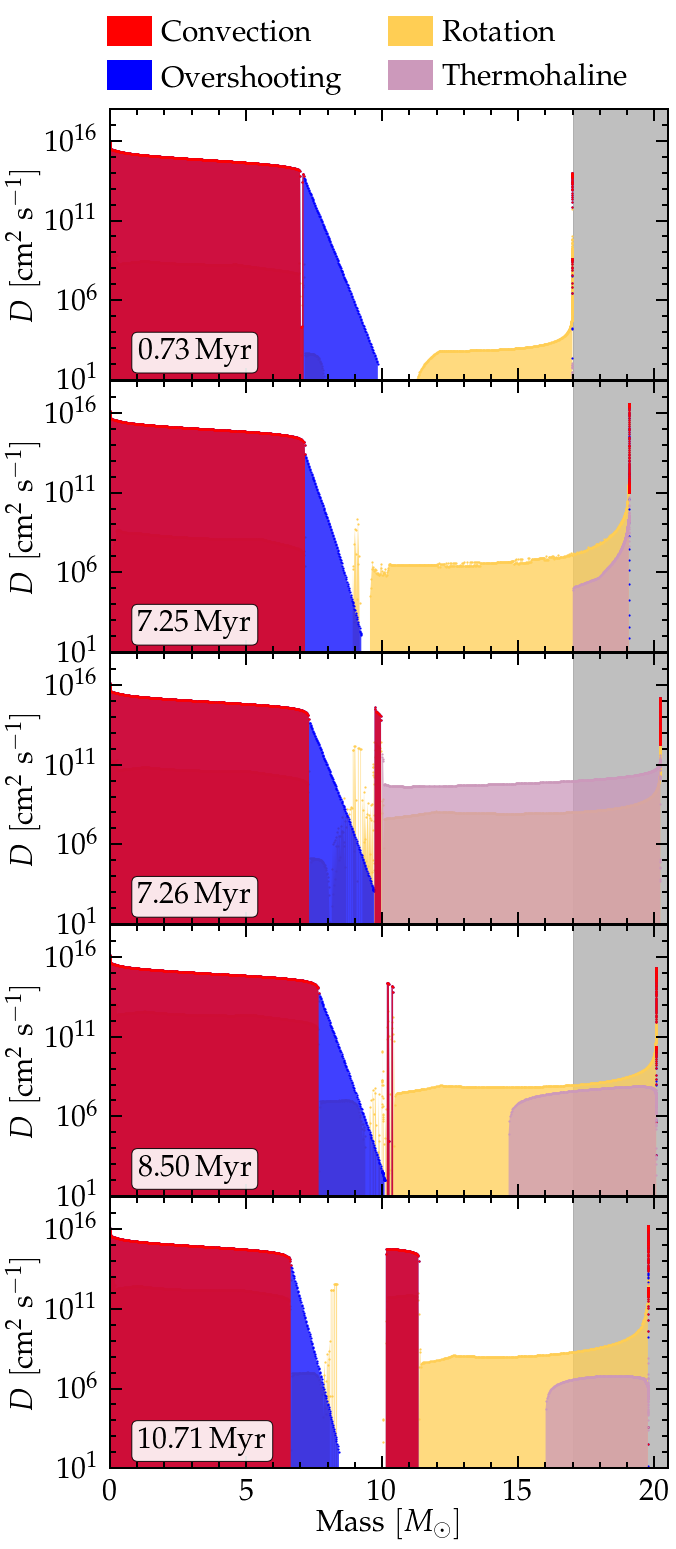

In [55]:
# D_mix vertical
fig = plt.figure(figsize=(10,25))
gs = gridspec.GridSpec(150, 100)
ax5 = fig.add_subplot(gs[:30, :])
ax4 = fig.add_subplot(gs[30:60, :])
ax3 = fig.add_subplot(gs[60:90, :])
ax2 = fig.add_subplot(gs[90:120, :])
ax1 = fig.add_subplot(gs[120:, :])
axes = [ax1, ax2, ax3, ax4, ax5]

LOGS = root+"binary_to_postRLOF/LOGS2/"
profiles_bin = sorted(glob.glob(LOGS+'/profile*.data'), key=get_modnum_from_profile)
LOGS_single = root+"accretor_to_TAMS/LOGS/" 
profiles_single = sorted(glob.glob(LOGS_single+'/profile*.data'), key=get_modnum_from_profile)
profiles = profiles_bin+profiles_single
    
profiles = [LOGS+'/profile450.data',
            LOGS+'/profile3850.data',
            LOGS+'/profile6500.data',
            LOGS_single+'/profile496.data',
            LOGS_single+'/profile893.data']

# revert order to get from top to bottom
profiles = profiles[::-1]

for pfile in profiles:
    legend = False
    ax_to_use = axes[profiles.index(pfile)]
    if ax_to_use == ax5:
        legend = True
    plot_Dmix(pfile, ax=ax_to_use, legend=legend)    

# beautification
ax1.set_xlabel(r"$\mathrm{Mass}\ [M_\odot]$")
# ax1.set_ylim(-1,18)
ax1.set_ylim(10**1, 10**18)
# ax3.set_ylabel(r"$\log_{10}(D / \mathrm{[cm^2\ s^{-1}]})$")
for ax in axes:
    if ax != ax1:
        ax.set_xticklabels([])
    ax.set_ylim(ax1.get_ylim())
    ax.set_xlim(xmin=0, xmax=20.5)
    ax.set_ylabel(r"$D \ \mathrm{[cm^2\ s^{-1}]}$")
    ax.axvspan(17, 20.5, alpha=0.5, color="#808080", zorder=0)
    ax.set_yticks([100, 1000, 1e4, 1e5, 1e6, 1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14, 1e15, 1e16,1e17], minor=True)
    ax.set_yticklabels([], minor=True)
   
fig.savefig('/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/D_mix_vertical.pdf')   


In [ ]:
def plot_Dmix_radius(pfile, ax=""):
    if ax == "":
        fig = plt.figure(figsize=(10,10))
        gs = gridspec.GridSpec(100, 100)
        ax = fig.add_subplot(gs[:, :])

    age = get_age_from_profile(pfile)
    title = f"{age:.2f}"+r"\,\mathrm{Myr}$"
        
    src, col = getSrcCol(pfile)
    r = src[:, col.index("radius")]
    log_D_mix = src[:, col.index('log_D_mix')]
    log_D_mix_non_rotation = src[:, col.index('log_D_mix_non_rotation')]
    log_D_conv = src[:, col.index('log_D_conv')]
    log_D_semi = src[:, col.index('log_D_semi')]
    log_D_thrm = src[:, col.index('log_D_thrm')]
    
    ax.plot(r, log_D_mix, lw=10, label="$\mathrm{Total}$", c="c")
    ax.plot(r, log_D_mix_non_rotation, label="$\mathrm{Excluding\ rotation}$", c='b')
    ax.plot(r, log_D_conv, label="$\mathrm{Convection}$", c="r")
    ax.plot(r, log_D_semi, label="$\mathrm{Semiconvection}$", c="m")
    ax.plot(r, log_D_thrm, label="$\mathrm{Thermohaline}$", c="#CC99BB")
    # ax.legend()
    # ax.set_title(title, fontsize=30)
    ax.text(0.5,0.92, title, fontsize=30, va="center", ha="center", transform=ax.transAxes)


# sanity checks

In [ ]:
# Hunter diagram for 13Msun Z=Z_LMC=0.0047
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.0047/13/rot_0.4_crit/LOGS/"

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)
ax = fig.add_subplot(gs[:, :])

ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")


src, col = getSrcCol(folder+"/history.data")
n14 = src[:, col.index("surface_n14")]
vrot = src[:, col.index("surf_avg_v_rot")]


label = "13Msun, Z=0.0047"
ax.plot(vrot, n14, c='b', label=label)
    

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 120)
ax = fig.add_subplot(gs[:,:])

for folder in folders:
    hfile = folder+'history.data'
    src, col = getSrcCol(hfile)
    L = src[:, col.index("log_L")]
    Teff = src[:, col.index("log_Teff")]
    mn = src[:, col.index("model_number")]
    if "binary" not in folder:
        ax.plot(Teff, L, label=folder.split('/')[-3].replace('_',' '))
    else:
        p = ax.scatter(Teff, L, c=mn)
fig.colorbar(p)
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/\mathrm{[K]})$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
ax.legend()